In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 5: k-nearest neighbor regressor

The knn algorithm can be also used for regression. 
The output is computed based on the average of the $y$ values of its nearest neighbors.

## Part 1 

Implement the knn algorithm for regression. Hint: the function `numpy.average` ([reference page](https://numpy.org/doc/stable/reference/generated/numpy.average.html#numpy.average)) can compute weighted averages. 

In [57]:
def knn_regressor(X,y,X_new,k,weights='uniform'):
    
    from sklearn.metrics import pairwise_distances
    
    # number of datapoints
    m,_ = X.shape
    m_new,_ = X_new.shape
    
    # distance matrix
    dist = pairwise_distances(X,X_new)
    
    # k nearest neighbor
    knn = np.argsort(dist,axis=0)[0:k]
    
    y_pred = np.zeros(m_new)
    for i in range(m_new):
        # labels
        nearest_yvalues = y[knn[:,i]]
        # weights
        if weights=='uniform':
            w = np.ones(k)
        elif weights=='distance':
            w=1/dist[knn[:,i],i]
        else:
            print('weights not recognized: should be uniform or distance')
            return 
        # prediction
        y_pred[i] = np.average(nearest_yvalues, weights=w)
    
    return y_pred

## Part 2

Consider the following data points

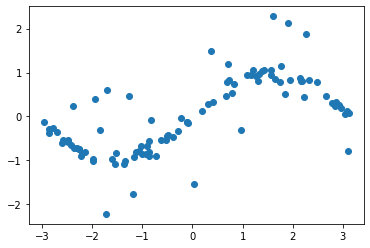

In [45]:
x = -np.pi + 2*np.pi*np.random.rand(100)
y = np.sin(x) + 0.1*np.random.randn(100) # y = sin(x) + random noise
x = x.reshape(-1,1) # reshape x as a column vector
y[::5] += 3 * (0.5 - np.random.rand(20)) # add outliers
plt.scatter(x,y)

Fit and plot a knn regressor with $k=1$.

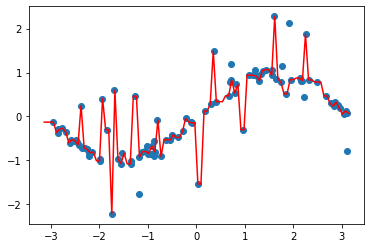

In [63]:
x_plot = np.linspace(-np.pi,np.pi,100).reshape(-1,1)
y_plot = knn_regressor(x,y,x_plot,k=1,weights='uniform')
plt.scatter(x,y)
plt.plot(x_plot,y_plot,color='red')

Fit and plot a knn regressor with $k=10$.

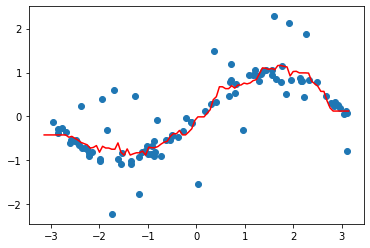

In [66]:
x_plot = np.linspace(-np.pi,np.pi,100).reshape(-1,1)
y_plot = knn_regressor(x,y,x_plot,k=10,weights='uniform')
plt.scatter(x,y)
plt.plot(x_plot,y_plot,color='red')